<a href="https://colab.research.google.com/github/ghamawell/friends-sitcom-data-analysis/blob/main/friends_sitcom_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
from google.colab import files
import numpy as np
import string
import re
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving friends_quotes.csv to friends_quotes.csv


In [ ]:
friends_quotes = list(uploaded.keys())[0]


In [ ]:
df = pd.read_csv(friends_quotes)


In [ ]:
pd.read_csv(friends_quotes, encoding='latin1')  # Contoh untuk encoding Latin-1


,author,episode_number,episode_title,quote,quote_order,season
0,Monica,1.0,Monica Gets A Roommate,There's nothing to tell! He's just some guy I ...,0.0,1.0
1,Joey,1.0,Monica Gets A Roommate,"C'mon, you're going out with the guy! There's ...",1.0,1.0
2,Chandler,1.0,Monica Gets A Roommate,"All right Joey, be nice. So does he have a hum...",2.0,1.0
3,Phoebe,1.0,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0
4,Phoebe,1.0,Monica Gets A Roommate,"Just, 'cause, I don't want her to go through w...",4.0,1.0
...,...,...,...,...,...,...
60286,Chandler,17.0,"The Last One, Part I & II","Oh, it's gonna be okay.",581.0,10.0
60287,Rachel,17.0,"The Last One, Part I & II",(crying) Do you guys have to go to the new hou...,582.0,10.0
60288,Monica,17.0,"The Last One, Part I & II",We got some time.,583.0,10.0
60289,Rachel,17.0,"The Last One, Part I & II","Okay, should we get some coffee?",584.0,10.0


In [ ]:
# Filter baris DataFrame yang memiliki label "Monica" di kolom "author"
monica_quotes = df[df['author'] == 'Monica']['quote']

# Gabungkan semua kutipan dari baris tersebut menjadi satu teks panjang
monica_text = ' '.join(monica_quotes)

# Pisahkan teks panjang menjadi kata-kata individu
monica_words = monica_text.split()

# Hitung frekuensi kemunculan setiap kata
word_counts = pd.Series(monica_words).value_counts()

# Temukan kata-kata yang paling dominan
top_words = word_counts.head(10000)  # Mengambil 3000 kata paling dominan

print("Kata-kata paling dominan dalam kutipan Monica:")
print(top_words)

Kata-kata paling dominan dalam kutipan Monica:
I               2565
you             2226
the             2118
to              1823
a               1466
                ... 
movers             1
attempt)           1
interrupting       1
wrap,              1
boxes,             1
Name: count, Length: 10000, dtype: int64


In [ ]:
# Filter DataFrame untuk episode_number antara 1.0 Sampai dengan  10000
filtered_df = df[(df['episode_number'] >= 1.0) & (df['episode_number'] <= 10000)]

# Menggabungkan semua kutipan menjadi satu string
all_quotes = ' '.join(filtered_df['quote'])

# Memisahkan string menjadi kata-kata individu
words = all_quotes.split()

# Menghitung frekuensi kemunculan setiap kata
word_counts = Counter(words)

# Menemukan kata yang paling sering muncul
most_common_word, frequency = word_counts.most_common(1)[0]

print(f"Kata paling dominan: '{most_common_word}' dengan frekuensi {frequency}")
print(top_words)

Kata paling dominan: 'I' dengan frekuensi 23113
I               2565
you             2226
the             2118
to              1823
a               1466
                ... 
movers             1
attempt)           1
interrupting       1
wrap,              1
boxes,             1
Name: count, Length: 10000, dtype: int64


In [ ]:
# Filter DataFrame untuk episode_number antara 1.0 dan 10000
filtered_df = df[(df['episode_number'] >= 1.0) & (df['episode_number'] <= 10000)]

# Menggabungkan semua episode_title menjadi satu string
all_titles = ' '.join(filtered_df['episode_title'])

# Memisahkan string menjadi kata-kata individu
words = all_titles.split()

# Menghitung frekuensi kemunculan kata "Monica"
monica_count = words.count('Monica')

print(f"Kata sebanyak {monica_count} kali dalam episode_title untuk episode_number antara 1.0 dan 10000.")
print(top_words)

Kata sebanyak 783 kali dalam episode_title untuk episode_number antara 1.0 dan 10000.
I               2565
you             2226
the             2118
to              1823
a               1466
                ... 
movers             1
attempt)           1
interrupting       1
wrap,              1
boxes,             1
Name: count, Length: 10000, dtype: int64


In [ ]:
# Temukan kata-kata yang paling dominan
top_words = word_counts.head(3000)  # Mengambil 10 kata paling dominan

AttributeError: 'Counter' object has no attribute 'head'

In [ ]:
# Memeriksa kolom yang ada di DataFrame
print("\nList of columns in the DataFrame before trimming:")
print(df.columns)


List of columns in the DataFrame before trimming:
Index(['author', 'episode_number', 'episode_title', 'quote', 'quote_order',
       'season'],
      dtype='object')


In [ ]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Menghapus angka
    text = re.sub(r'\d+', '', text)
    return text

In [ ]:
# Menerapkan fungsi pembersihan teks pada kolom 'quote'
df['cleaned_quote'] = df['quote'].apply(clean_text)


In [ ]:
# Menampilkan beberapa baris pertama dari kolom yang telah dibersihkan
print(df[['quote', 'cleaned_quote']].head())



                                               quote  \
0  There's nothing to tell! He's just some guy I ...   
1  C'mon, you're going out with the guy! There's ...   
2  All right Joey, be nice. So does he have a hum...   
3                           Wait, does he eat chalk?   
4  Just, 'cause, I don't want her to go through w...   

                                       cleaned_quote  
0  theres nothing to tell hes just some guy i wor...  
1  cmon youre going out with the guy theres gotta...  
2  all right joey be nice so does he have a hump ...  
3                             wait does he eat chalk  
4  just cause i dont want her to go through what ...  


In [ ]:
from collections import Counter

# Menggabungkan semua teks dari kolom 'cleaned_quote'
all_text = ' '.join(df['cleaned_quote'])

# Memisahkan teks menjadi kata-kata individual
words = all_text.split()

# Menampilkan beberapa kata pertama
print(words[:60291])


['theres', 'nothing', 'to', 'tell', 'hes', 'just', 'some', 'guy', 'i', 'work', 'with', 'cmon', 'youre', 'going', 'out', 'with', 'the', 'guy', 'theres', 'gotta', 'be', 'something', 'wrong', 'with', 'him', 'all', 'right', 'joey', 'be', 'nice', 'so', 'does', 'he', 'have', 'a', 'hump', 'a', 'hump', 'and', 'a', 'hairpiece', 'wait', 'does', 'he', 'eat', 'chalk', 'just', 'cause', 'i', 'dont', 'want', 'her', 'to', 'go', 'through', 'what', 'i', 'went', 'through', 'with', 'carl', 'oh', 'okay', 'everybody', 'relax', 'this', 'is', 'not', 'even', 'a', 'date', 'its', 'just', 'two', 'people', 'going', 'out', 'to', 'dinner', 'and', 'not', 'having', 'sex', 'sounds', 'like', 'a', 'date', 'to', 'me', 'alright', 'so', 'im', 'back', 'in', 'high', 'school', 'im', 'standing', 'in', 'the', 'middle', 'of', 'the', 'cafeteria', 'and', 'i', 'realize', 'i', 'am', 'totally', 'naked', 'oh', 'yeah', 'had', 'that', 'dream', 'then', 'i', 'look', 'down', 'and', 'i', 'realize', 'theres', 'a', 'phone', 'there', 'instead',

In [ ]:
# Menghitung frekuensi setiap kata
word_counts = Counter(words)

# Menampilkan 10 kata paling umum
print(word_counts.most_common(60291))


[('you', 23758), ('i', 23646), ('the', 18646), ('to', 16657), ('a', 13308), ('and', 12510), ('it', 9071), ('that', 8321), ('oh', 7570), ('what', 6723), ('is', 6647), ('in', 5953), ('of', 5863), ('this', 5815), ('me', 5525), ('just', 5430), ('so', 5347), ('no', 5308), ('my', 5301), ('on', 4823), ('yeah', 4800), ('okay', 4744), ('know', 4706), ('do', 4389), ('have', 4281), ('we', 4259), ('well', 4232), ('not', 4209), ('with', 4192), ('her', 4018), ('for', 3996), ('was', 3933), ('hey', 3839), ('all', 3721), ('but', 3636), ('be', 3631), ('are', 3596), ('he', 3521), ('right', 3440), ('she', 3267), ('up', 3246), ('like', 3163), ('your', 3135), ('out', 3131), ('at', 2987), ('im', 2944), ('get', 2861), ('gonna', 2810), ('i\x92m', 2796), ('about', 2706), ('him', 2590), ('go', 2561), ('really', 2549), ('ross', 2533), ('can', 2412), ('here', 2402), ('its', 2358), ('think', 2270), ('joey', 2266), ('uh', 2264), ('look', 2206), ('if', 2189), ('don\x92t', 2135), ('one', 2049), ('it\x92s', 2049), ('do

In [ ]:
most_common_word, frequency = word_counts.most_common(1)[0]
print(f"Kata yang paling dominan adalah '{most_common_word}' dengan frekuensi {frequency}")

Kata yang paling dominan adalah 'you' dengan frekuensi 23758


In [ ]:
from collections import Counter

# Menggabungkan semua quotes menjadi satu string
all_quotes = ' '.join(df['quote'])

# Memisahkan string menjadi kata-kata individu
words = all_quotes.split()

# Menghitung frekuensi kemunculan setiap kata
word_counts = Counter(words)

# Mengidentifikasi kata-kata yang muncul lebih dari sekali
common_words = {word: count for word, count in word_counts.items() if count > 100
                }


print("Kata yang sama dalam kolom 'quote':")
print(common_words)

Kata yang sama dalam kolom 'quote':
{"There's": 110, 'nothing': 221, 'to': 14605, "He's": 163, 'just': 4728, 'some': 1054, 'guy': 589, 'I': 23113, 'work': 336, "you're": 884, 'going': 1243, 'out': 2135, 'with': 3935, 'the': 17545, 'gotta': 483, 'be': 3425, 'something': 650, 'wrong': 146, 'him!': 124, 'All': 1277, 'right': 1008, 'Joey,': 446, 'nice.': 108, 'So': 1246, 'does': 397, 'he': 1939, 'have': 4066, 'a': 12824, 'A': 315, 'and': 10193, 'eat': 162, "don't": 1782, 'want': 1531, 'her': 2778, 'go': 1584, 'through': 256, 'what': 2745, 'went': 327, 'Okay,': 1641, 'This': 821, 'is': 5653, 'not': 3465, 'even': 575, "It's": 836, 'two': 553, 'people': 441, 'dinner': 105, 'having': 391, 'like': 2712, 'date': 165, 'me.': 958, 'Alright,': 201, 'so': 3021, "I'm": 2828, 'back': 1009, 'in': 5182, 'high': 131, 'of': 5639, 'am': 687, 'totally': 239, 'Oh,': 2978, 'yeah.': 204, 'that': 6043, 'Then': 180, 'look': 959, "there's": 253, 'there.': 317, "That's": 494, 'right.': 572, 'had': 1013, 'No.': 477

In [ ]:
from collections import Counter

# Menggabungkan semua kutipan menjadi satu string
all_quotes = ' '.join(df['quote'])

# Memisahkan string menjadi kata-kata individu
words = all_quotes.split()

# Menghitung frekuensi kemunculan setiap kata
word_counts = Counter(words)

# Periksa apakah frekuensi kemunculan kata "dan" mencapai nilai 300
dan_count = word_counts.get('dan', 0)

if dan_count == 300:
    print("Kata 'dan' muncul 300 kali dalam kolom 'quote'.")
else:
    print(f"Kata 'dan' muncul {dan_count} kali dalam kolom 'quote', bukan 300 kali.")

Kata 'dan' muncul 0 kali dalam kolom 'quote', bukan 300 kali.


In [ ]:
# Menggabungkan semua teks dalam kolom 'quote' menjadi satu string besar
all_quotes = ' '.join(df['quote'].astype(str))

# Memisahkan string besar menjadi kata-kata individu
words = all_quotes.split()

# Menghitung frekuensi kemunculan setiap kata
word_counts = Counter(words)

# Menemukan frekuensi kemunculan kata "and", "if", dan "or"
and_frequency = word_counts['and']
if_frequency = word_counts['if']
or_frequency = word_counts['or']

print(f"Kata 'and' muncul sebanyak {and_frequency} kali.")
print(f"Kata 'if' muncul sebanyak {if_frequency} kali.")
print(f"Kata 'or' muncul sebanyak {or_frequency} kali.")

Kata 'and' muncul sebanyak 10193 kali.
Kata 'if' muncul sebanyak 1808 kali.
Kata 'or' muncul sebanyak 675 kali.


<ipython-input-55-71430ba5622a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=word_freq_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


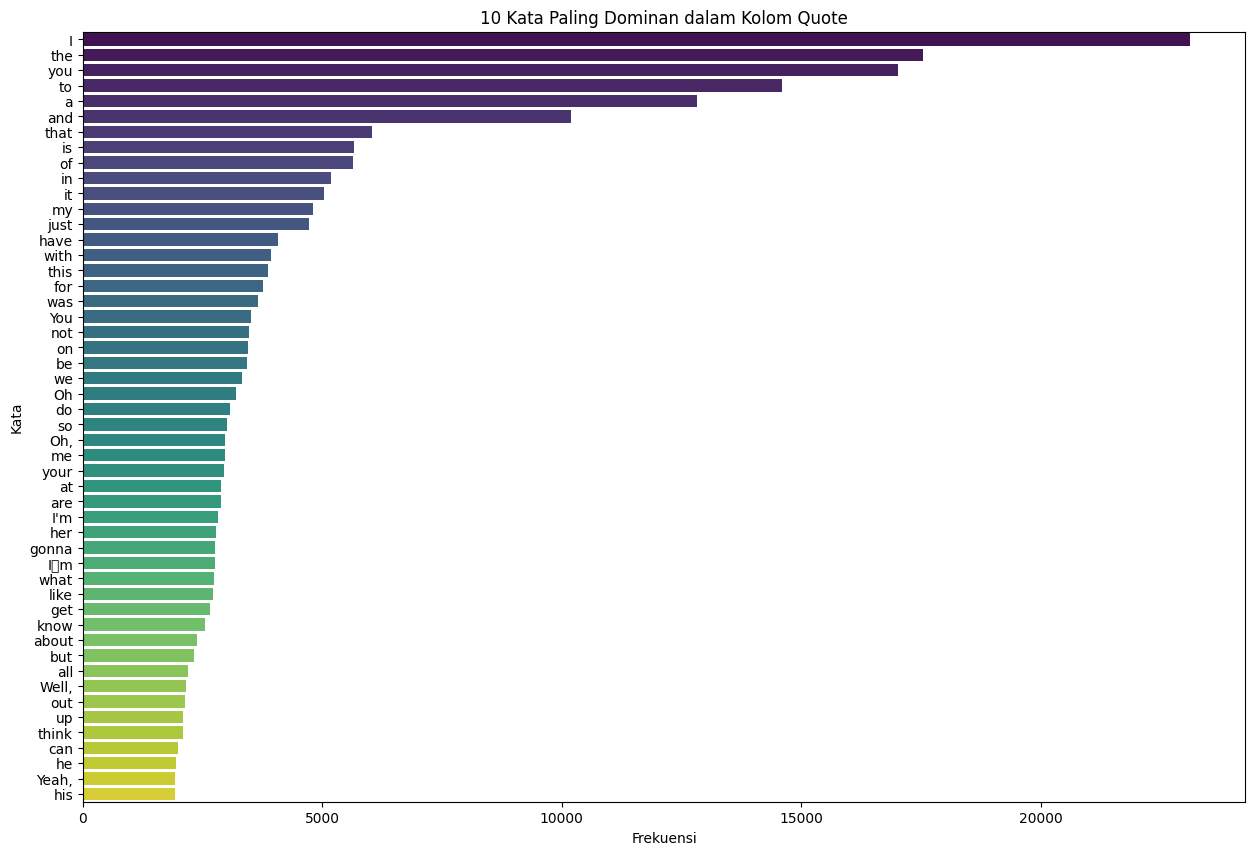

In [ ]:
# Menggabungkan semua teks dalam kolom 'quote' menjadi satu string besar
all_quotes = ' '.join(df['quote'].astype(str))

# Memisahkan string besar menjadi kata-kata individu
words = all_quotes.split()

# Menghitung frekuensi kemunculan setiap kata
word_counts = Counter(words)

# Menemukan 10 kata yang paling sering muncul
most_common_words = word_counts.most_common(50)

# Memisahkan kata dan frekuensinya untuk visualisasi
words, frequencies = zip(*most_common_words)

# Membuat DataFrame untuk visualisasi
word_freq_df = pd.DataFrame({'word': words, 'frequency': frequencies})

# Membuat grafik batang
plt.figure(figsize=(15, 10))
sns.barplot(x='frequency', y='word', data=word_freq_df, palette='viridis')
plt.title('10 Kata Paling Dominan dalam Kolom Quote')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()